# Amostra de distribuições com numpy e scipy

A biblioteca  numpy oferece um conjunto de funções que geram valores aleatórios, esses valores podem vir de diferentes tipos de distribuições estatísticas e nos fornecem um conjunto de dados pertencentes aos valores do espaço de amostra dessas distribuições.

Na prática, se precisássemos de um conjunto de 100 dados que sigam uma distribuição normal, teríamos que fazer uma chamada para a função normal indicando a média e o desvio padrão:

```python
    >> media = 0
    >> desvio = 1
    >> numpy.random.normal(media, desvio, 100)
```

Vamos trabalhar com dados de diferentes distribuições (dados por numpy.random) para visualizar o comportamento dessas variáveis. A quantidade de dados será grande para podermos apreciar corretamente sua forma gráfica.

É importante reconhecer visualmente o comportamento estatístico das variáveis, já que é uma primeira aproximação à modelagem e previsão desses dados. Muitas vezes é possível ter uma ideia de como eles se comportam matematicamente apenas visualizando-os em um gráfico.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

### Distribuição uniforme discreta.
Diz-se que uma variável segue uma distribuição uniforme discreta (se escreve **_X_ ~ ** _unif_ {$x_1, x_2, ... x_n$}) se a probabilidade de aparição dos valores em cada ensaio for constante e igual: 

\begin{equation*}
P(x_i)= \dfrac{1}{n}
\end{equation*}

Onde **_P_** é a probabilidade, **_x_** valores dentro do espaço amostral e **_n_** a quantidade de elementos do espaço amostral.

A seguir, vamos realizar uma chamada à função ```randint``` que ajusta a valores provenientes de uma distribuição uniforme discreta, com a motivação de simular o lançamento de um dado equilibrado 6000 vezes...

C:\Users\sn3fru\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


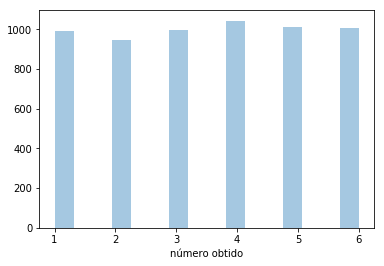

In [47]:
# Definimos o domínio do dado, onde somamos 1 ao valor máximo... por quê?
valor_min = 1
valor_max = 6 + valor_min

# Definimos a quantidade de lançamentos do dado.
lançamentos = 6000

# Fazemos uma chamada à função randint, que retorna o resultado de cada lançamento
samples_uniforme = np.random.randint(low = valor_min,
                                     high = valor_max,
                                     size = lançamentos)

# Representamos graficamente os resultados
sns.distplot(samples_uniforme, axlabel = 'número obtido', kde=False);

In [48]:
# distribuição acumulada:
# df = pd.DataFrame(samples_uniforme,columns=['face'])
# df.groupby('face').size().hist(cumulative=True)

### Distribuição de Bernoulli

Distribuição discreta de espaço amostral {0, 1}, que tem valor 1 com a probabilidade de sucesso p e valor 0 com a probabilidade de falha q=1-p.

Um exemplo simples é jogar um dado, onde uma face tem probabilidade p e a outra o complemento (1-p). Em um dado honesto, p=.5


A média dessa distribuição é sempre = p
e a Variância = p(1-p)

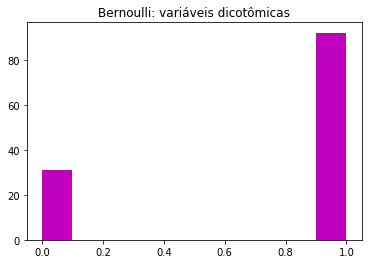

In [6]:
from scipy.stats import bernoulli
bern = bernoulli.rvs(p=0.7, size=123)

plt.title('Bernoulli: variáveis dicotômicas')
plt.hist(bern, color='m');

In [111]:
bern[:10]

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1])

In [112]:
bern.sum() # casos na amostra

84

In [113]:
bern.sum()/len(bern) # média empirica

0.6829268292682927

In [50]:
print('Média Verdadeira: 0.7, Variância Verdadeira: 0.21')
for n in [3,10,100,1000,10000,100000,1000000]:
    bern = bernoulli.rvs(p=0.7, size=n)
    print('\namostra:',n)
    print('média:', bern.sum()/len(bern))
    print('var:', bern.std()**2)    

Média Verdadeira: 0.7, Variância Verdadeira: 0.21

amostra: 3
média: 1.0
var: 0.0

amostra: 10
média: 0.9
var: 0.09000000000000002

amostra: 100
média: 0.75
var: 0.18749999999999997

amostra: 1000
média: 0.688
var: 0.214656

amostra: 10000
média: 0.7008
var: 0.20967935999999998

amostra: 100000
média: 0.69961
var: 0.21015584789999997

amostra: 1000000
média: 0.699868
var: 0.21005278257599996


In [27]:
0.7*(1-0.7)
p(1-p)

0.21000000000000002

### Distribuição Binomial.

Mede o número de sucessos em uma sequência de _**n**_ ensaios independentes entre si, com uma probabilidade fixa **_p_** de ocorrência de sucesso entre os ensaios.

Quando uma variável **_X_** segue uma distribuição binomial, escreve-se **_X ~ B (n, p)_** . Onde **_p_** é a probabilidade de sucesso (que é fixa), y _**n**_ o número de ensaios. 

A função da probabilidade é:

\begin{equation*}
f(x)=  \binom {n}{x} (p)^x (1-p)^{(n-x)}
\end{equation*}

Onde **_x_** é a quantidade de acertos, **_p_** a probabilidade de sucesso, **_n_** a quantidade de ensaios.



Neste caso, vamos simular o lançamento de uma moeda 8 vezes por ensaio, onde a probabilidade de sucesso (obter cara) será 0,5. A seguir, a função de distribuição para o caso:

\begin{equation*}
f(x)= \binom {8}{x} (0,5)^x (1-0,5)^{(8-x)}
\end{equation*}

Vamos realizar um chamado à função```binomial``` que ajusta a valores provenientes de uma distribuição binomial e vamos realizar 10.000 ensaios para montar a distribuição.

Nota: A distribuição de Bernoulli é um caso especial da distribuição Binomial, com n = 1 e sua média, como esperado é np (contra p) e a variância teórica é np(1-p) (contra p(1-p) )


In [52]:
samples_binomial[:100]

array([5, 5, 3, 7, 4, 7, 4, 7, 3, 3, 3, 5, 5, 3, 5, 5, 3, 4, 5, 4, 7, 3,
       4, 5, 4, 3, 5, 6, 6, 2, 3, 6, 4, 4, 5, 5, 6, 5, 1, 4, 4, 5, 4, 3,
       6, 7, 3, 6, 5, 1, 2, 3, 4, 4, 4, 5, 5, 5, 6, 2, 4, 3, 1, 6, 2, 3,
       3, 3, 3, 4, 2, 5, 4, 4, 2, 2, 3, 2, 5, 3, 3, 5, 3, 6, 5, 4, 3, 3,
       3, 4, 4, 3, 5, 4, 5, 4, 3, 5, 6, 6])

C:\Users\sn3fru\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


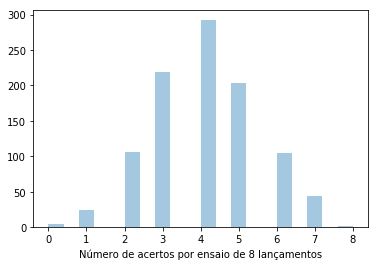

In [51]:
# definimos a quantidade de ensaios.
quantidade_ensaios = 1000

# definimos a quantidade de lançamentos por ensaio.
lançamentos = 8

# definimos a probabilidade de obter cara em cada lançamento.
probabilidade_sucesso = 0.5

# binomial retorna o número de sucessos de cada vez que se realizou um ensaio de 8 lançamentos.
samples_binomial = np.random.binomial(n = lançamentos, p = probabilidade_sucesso, size = quantidade_ensaios)

# construímos um gráfico.
eixo_x = 'Número de acertos por ensaio de 8 lançamentos'
sns.distplot(samples_binomial, axlabel = eixo_x, kde = False);

### Distribuição de Poisson

É uma distribuição de probabilidade de variável aleatória **discreta** que expressa a probabilidade de uma série de eventos ocorrer num certo período de tempo se estes eventos ocorrem **independentemente** de quando ocorreu o último evento. Por exemplo, o número de clientes que entram em um banco durante a manhã ou o número de falhas de um carro durante um trajeto (embora podemos argumentar que esses eventos não são exatamente independentes).

Esta distribuição tem como parâmetro $\lambda$, que é sempre maior que zero. Este parâmetro indica o número médio de ocorrências de um evento por unidade contínua (como tempo ou espaço). Por exemplo, se o evento ocorre a uma média de 4 minutos, e estamos interessados no número de eventos que ocorrem num intervalo de 10 minutos, usariámos como modelo a distribuição de Poisson com λ = 10/4 = 2.5.

Quando uma variável **_X_** segue uma distribuição de Poisson, escreve-se **_X ~ Poisson ($\lambda$)_** e a função de probabilidade é:

\begin{equation*}
f(x)= e^{-\lambda} \dfrac{\lambda^x}{x!}
\end{equation*}

* $e$ é base do logaritmo natural ($e$ = 2.71828...),
* ! significa fatorial, muito usado em arranjos e permutações. Ex: Placa de carro.

Propomos o exemplo de um trem onde ocorre uma média de 1,5 falhas por dia, portanto $\lambda = 1,5 $ e nossa função de probabilidades: 

\begin{equation*}
f(x)= e^{-1.5} \dfrac{1.5^x}{x!}
\end{equation*}

Vamos obter um conjunto de dados provenientes de uma distribuição de Poisson através da chamada à função ```poisson```, com a motivação de modelar o problema apresentado.


A distribuição de Poisson representa um modelo probabilístico adequado para o estudo de um grande número de fenômenos observáveis. Eis alguns exemplos:

- Chamadas telefônicas por unidade de tempo;
- Defeitos por unidade de área;
- Acidentes por unidade de tempo;
- Chegada de clientes a um supermercado por unidade de tempo;
- Número de glóbulos sangüíneos visíveis ao microscópio por unidade de área;
- Número de partículas emitidas por uma fonte de material radioativo por unidade de tempo.

Nota: tanto a média quanto a variância em uma distribuição de Poisson é dado por $\lambda$

[Calculadora](http://www.elektro-energetika.cz/calculations/po.php)
(Será que conseguimos construir uma calculadora em python nesse estilo?)

C:\Users\sn3fru\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


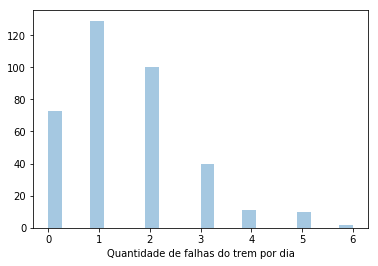

In [54]:
# Definimos os parâmetros para a distribuição (não utilizamos a palavra lambda porque está reservada)
parametro_lambda = 1.5

# Definimos a quantidade de dias em que contamos quantas falhas houve.
dias_contados = 365

# poisson retorna a quantidade de falhas por dia.
samples_poisson = np.random.poisson(lam = parametro_lambda,
                                    size = dias_contados)

# construímos o gráfico
eixo_x = 'Quantidade de falhas do trem por dia'
sns.distplot(samples_poisson, axlabel = eixo_x, kde=False);

In [55]:
samples_poisson[:100]

array([1, 1, 1, 2, 1, 1, 0, 0, 5, 0, 2, 0, 1, 6, 1, 1, 2, 3, 3, 0, 1, 2,
       2, 1, 1, 0, 2, 2, 1, 1, 3, 2, 2, 3, 5, 3, 1, 1, 0, 1, 3, 1, 1, 2,
       2, 1, 0, 3, 2, 0, 1, 3, 0, 3, 0, 2, 0, 2, 1, 1, 2, 3, 2, 2, 3, 2,
       2, 1, 2, 4, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0, 5,
       2, 2, 5, 3, 0, 1, 0, 1, 0, 2, 0, 0])

### Distribuição Exponencial


Esta é uma distribuição que se caracteriza por ter uma função de taxa de falha constante. A distribuição exponencial é a única com esta propriedade. Ela é considerada uma das mais simples em termos matemáticos. Esta distribuição tem sido usada extensivamente como um modelo para o tempo de vida de certos produtos e materiais. Ela descreve adequadamente o tempo de vida de óleos isolantes e dielétricos, entre outros.


De uma forma bastante resumida imagine uma variável aleatória Poisson, onde temos a contagem do número de ocorrências em um intervalo. Suponha agora que estejamos interessados em verificar a probabilidade do tempo transcorrido entre duas ocorrências consecutivas. Essa última é considerada uma variável aleatória exponencial.


Essa distribuição contínua que pode ser utilizada para descrever as probabilidades envolvidas no tempo que decorre para que um determinado evento aconteça. Existe uma conexão muito próxima entre a distribuição exponencial e a de Poisson. Ou seja, é Utilizada para descrever o tempo entre as ocorrências de sucessivos eventos de uma distribuição de Poisson. As relações entre as distribuições podem ser associadas a um processo estocástico, chamado de processo de poisson.




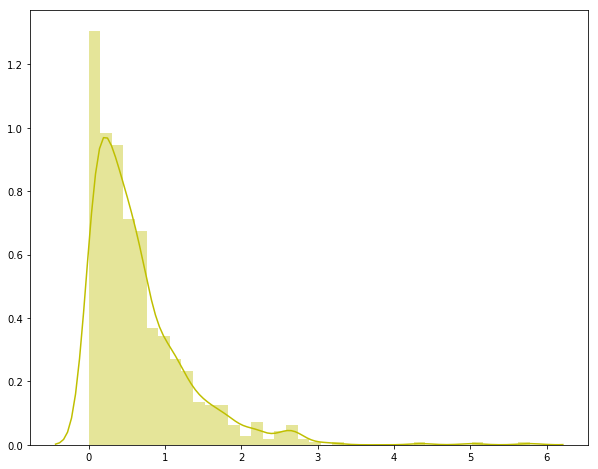

In [40]:
# Nós herdamos o parâmetro lambda e o período de tempo da distribuição anterior ...
parametro_lambda = 1.5
dias_contados = 365

# poisson retorna o número de falhas por dia.
samples_exp = np.random.exponential(1/parametro_lambda, dias_contados*2)

# por fim, plotamos
plt.figure(figsize=(10,8))
sns.distplot(samples_exp, color='y');

## Distribuição Normal

A distribuição normal (ou Guassiana) modela uma grande quantidade de variáveis observadas na natureza, como a estatura ou peso de uma população.

Também sob certas condições, algumas distribuições se comportam como normais, isto é conhecido como o **teorema do limite central**.

É possível ajustar uma distribuição de Poisson a uma normal quando $\lambda$ é um valor de grande magnitude: (podem rodar posteriormente a distribuição Poisson alterando o lambda para algo em torno de 15e dias_contados para em torno de 3000 que verá que a forma da distribuição ficará parecida com nossa normal)

Também é possível ajustar uma binomial a uma distribuição normal. Para isso, propõe-se como exemplo agregar o argumento ```fit=stats.norm``` à construção do gráfico.

Dizemos que uma variável aleatória _**X**_ segue uma distribuição normal **_X ~ N ( $\mu$, $\sigma$)_** se sua distribuição de probabilidades estiver dada por:

\begin{equation*}
p(x)= \dfrac{1}{\sqrt{2 \pi \sigma^²}} e^ \dfrac{-(x-\mu)^2}{2 \sigma^2}
\end{equation*}

Imaginemos um exemplo em que temos uma população de animais cujo peso segue uma distribuição normal, com $\mu = 342,73 $ kg e $\sigma = 45,78 $ kg

A seguir, vamos usar um conjunto de amostras que vêm de uma distribuição normal, chamando à função ```normal``` do numpy com os parâmetros propostos.

C:\Users\sn3fru\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


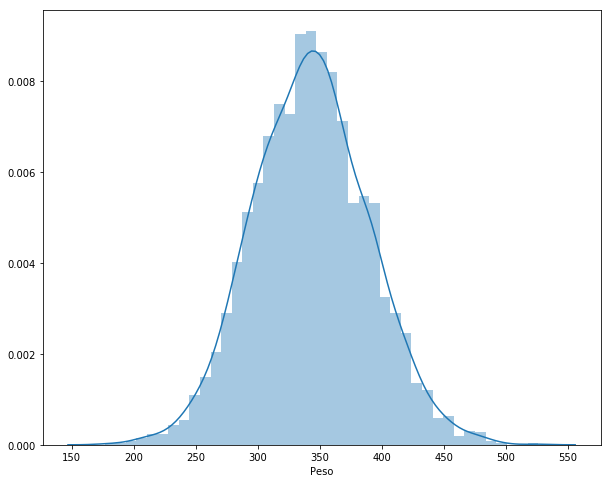

In [56]:
# definimos a média
media = 342.73

# definimos o desvio padrão
desvio_padrão = 45.78

# quantidade de amostras na população
n_amostras = 3000

# chamamos à função normal
samples_normal = np.random.normal(loc = media, 
                                  scale = desvio_padrão, 
                                  size = n_amostras)

# construímos o gráfico
eixo_x = 'Peso'
plt.figure(figsize=(10,8))
sns.distplot(samples_normal, axlabel = eixo_x)
plt.show()

# plt.figure(figsize=(10,8))
# sns.distplot(samples_normal,
#              hist_kws=dict(cumulative=True),
#              kde_kws=dict(cumulative=True))

# plt.show()

n: 10


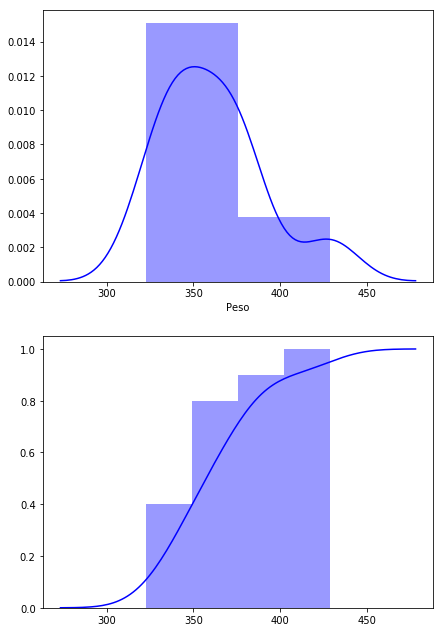

n: 100


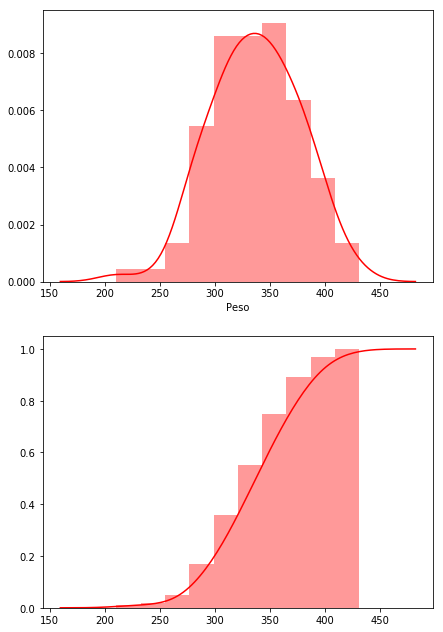

n: 1000


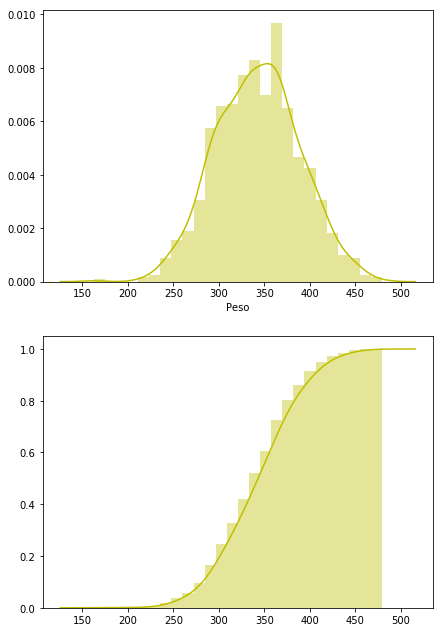

n: 10000


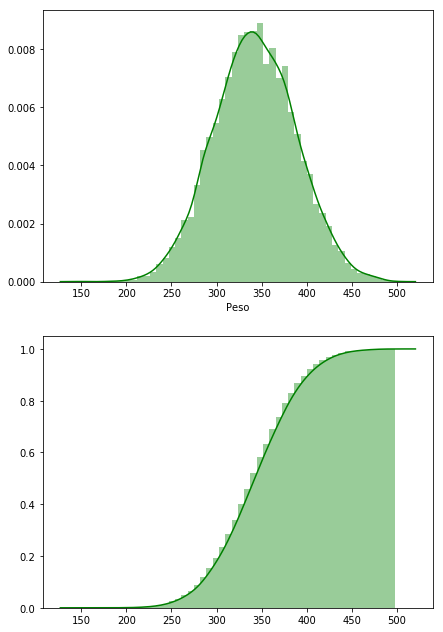

In [152]:
for n, c in [[10,'b'],[100,'r'],[1000,'y'],[10000,'g']]:
    print('n:',n)
    
    fig, ax =plt.subplots(2,1,figsize=(7, 11))

    samples_normal = np.random.normal(loc = media,
                                      scale = desvio_padrão,
                                      size = n)
    sns.distplot(samples_normal,
                 axlabel = eixo_x,
                 ax=ax[0],
                 color=c)
    
    sns.distplot(samples_normal,
                 hist_kws=dict(cumulative=True),
                 kde_kws=dict(cumulative=True),
                 ax=ax[1], color=c)
    
    plt.show()

### Distribuição normal padrão

Existe uma infinidade de possibilidade para uma variável X seguir uma distribuição Normal com média $\mu$ e desvio $\sigma$ quaisquer:

$X \sim \mathcal{N}(\mu,\,\sigma^{2})\,$

Uma forma mais fácil de trabalhar com uma distribuição que segue uma normal é tornando-a uma normal padrão, e fazemos isso com uma operação bastante simples, basicamente dividindo todos os valores pela média da amostra e dividindo esse resultado pelo desvio padrão da amostra.

Isso faz com que a média seja centrada no zero e o desvio padrão em um e isso vai simplificar muito as contas de agora em diante.

A escala horizontal do gráfico da distribuição normal padrão corresponde ao score-z que é uma medida de posição que indica o número de desvios padrão em que um valor se encontra a partir da média. Podemos transformar um valor x em escore-z usando a fórmula:

$Z \sim \dfrac{x - \mu} {\sigma^{2}\,} $


**Propriedades da distribuição normal padrão**
- A área acumulada é próxima de 0 para z-scores próximos a z=-3,49.
- A área acumulada aumenta conforme os z-scores aumentam.
- A área acumulada para z=0 é 0,5000.
- A área acumulada é próxima a 1 para z-scores próximos a z=3,49.



In [57]:
new_samples_normal = []

samples_normal_std = samples_normal.std()
for row in samples_normal:
    new_value = (row-342.73)/samples_normal_std
    new_samples_normal.append(new_value)

C:\Users\sn3fru\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sn3fru\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


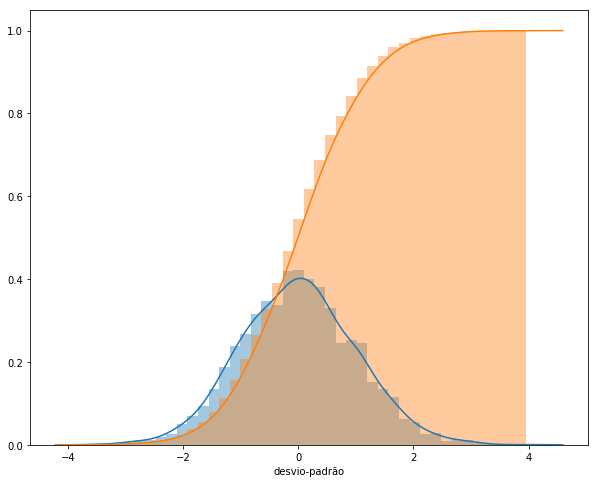

In [58]:
# construímos o gráfico
eixo_x = 'Peso'
plt.figure(figsize=(10,8))
sns.distplot(new_samples_normal, axlabel = 'desvio-padrão')
sns.distplot(new_samples_normal,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

### Z-score

![z-score e suas probabilidades](http://www.portalaction.com.br/sites/default/files/EstatisticaBasica/figuras/distribuicaoNormal/normal3.PNG)

In [41]:
import scipy.stats
scipy.stats.norm(0, 1).cdf(0)

0.5

In [42]:
scipy.stats.norm(0, 1).cdf(1)

0.8413447460685429

In [44]:
scipy.stats.norm(0, 1).cdf(1)- scipy.stats.norm(0, 1).cdf(0)

0.3413447460685429

### Teste de Normalidade

O test shapiro-wilks é um indicador de quão bem os nossos dados se ajustam à distribuição normal.

In [116]:
# resultado_poisson = stats.shapiro(samples_uniforme)
# resultado_uniforme = stats.shapiro(samples_uniforme)
# resultado_binomial = stats.shapiro(samples_binomial)
# resultado_normal = stats.shapiro(samples_normal)

# print('poisson: ', resultado_poisson)
# print('uniforme:', resultado_uniforme)
# print('binomial:', resultado_binomial)
# print('normal: ', resultado_normal)

### Test de Kolmogorow-Smirnov

In [114]:
# from scipy.stats import kstest, ks_2samp

# #kstest(np.random.choice(samples_normal, 500, replace=False), 'norm')
# #stats.kstest(samples_normal,'norm', alternative = 'greater', mode='asymp')
# stats.kstest(samples_normal,'norm')

In [115]:
# ks_2samp(np.random.choice(samples_normal, 50, replace=False), np.random.choice(samples_normal, 50, replace=True))

<br> <br>
![mapa_distribuicoes](http://blog.cloudera.com/wp-content/uploads/2015/12/distribution.png)
<br> <br>